Author: Vince Lai

# CS171 Final Project

## Model Notebook: Linear Regression & Random Forest for AQI Forecasting

In [1]:
# import module 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv("vince_clean_airquality.csv")
df.head()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Datetime,hour,day_of_week,month,AQI,AQI_next_hour
0,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,2004-03-10 18:00:00,18.0,2.0,3.0,839.1125,769.5500
1,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,2004-03-10 19:00:00,19.0,2.0,3.0,769.5500,795.5000
2,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,2004-03-10 20:00:00,20.0,2.0,3.0,795.5000,813.2750
3,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,2004-03-10 21:00:00,21.0,2.0,3.0,813.2750,770.8125
4,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,2004-03-10 22:00:00,22.0,2.0,3.0,770.8125,726.9625


In [3]:
# select features & target
feature_cols = [
    'hour', 'day_of_week', 'month'
] + [c for c in df.columns if 'PT08' in c or 'NO' in c] + ['T', 'RH', 'AH']
X = df[feature_cols].values
y = df['AQI_next_hour'].values

In [4]:
split_index = int(0.8 * len(df))

X_train = X[:split_index]
X_test = X[split_index:]

y_train = y[:split_index]
y_test = y[split_index:]

In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

lr_pred = lr.predict(X_test_scaled)

lr_mae = mean_absolute_error(y_test, lr_pred)
lr_rmse = mean_squared_error(y_test, lr_pred) ** 0.5
lr_r2 = r2_score(y_test, lr_pred)

print("LINEAR REGRESSION RESULTS")
print("MAE :", lr_mae)
print("RMSE:", lr_rmse)
print("R²  :", lr_r2)

LINEAR REGRESSION RESULTS
MAE : 47.343071992259105
RMSE: 65.32524914308641
R²  : 0.7821907613220671


In [9]:
# Random Forest Regressor
rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=15,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

rf_mae = mean_absolute_error(y_test, rf_pred)
rf_rmse = mean_squared_error(y_test, rf_pred) ** 0.5 
rf_r2 = r2_score(y_test, rf_pred)

print("RANDOM FOREST RESULTS")
print("MAE :", rf_mae)
print("RMSE:", rf_rmse)
print("R²  :", rf_r2)

RANDOM FOREST RESULTS
MAE : 49.01977136956326
RMSE: 63.02429143351019
R²  : 0.7972643653534394


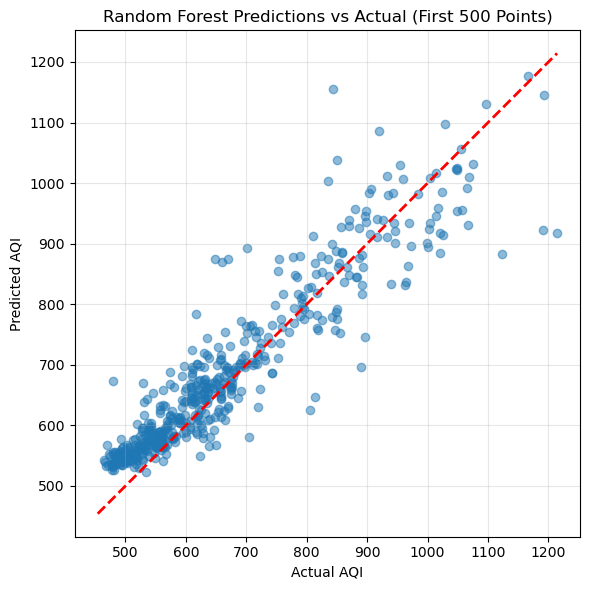

In [11]:
# predict vs actual plot
plt.figure(figsize=(6,6))
plt.scatter(y_test[:500], rf_pred[:500], alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], 'r--', lw=2)

plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("Random Forest Predictions vs Actual (First 500 Points)")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

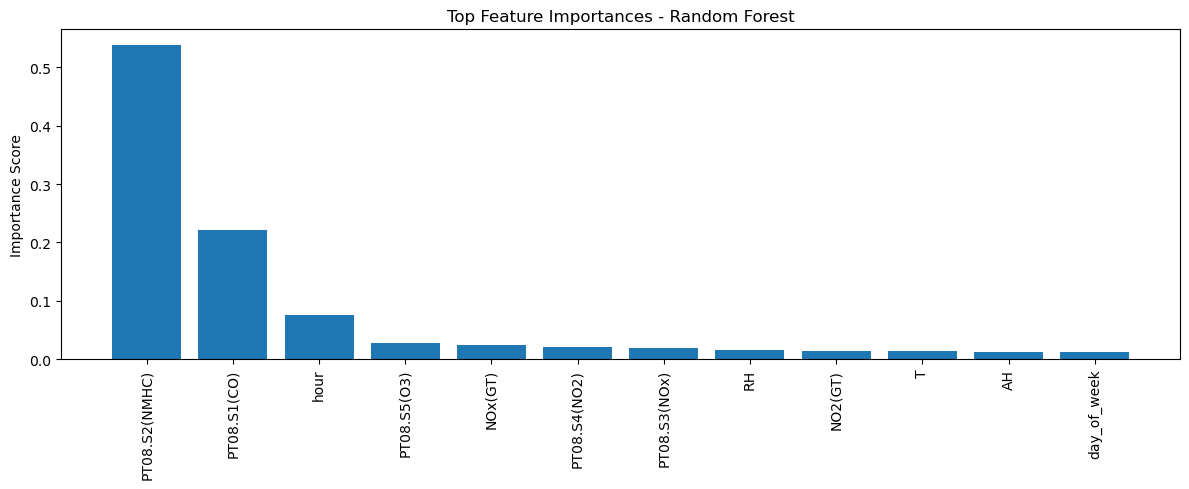

In [12]:
# feature importance plot
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
sorted_features = np.array(feature_cols)[indices]

plt.figure(figsize=(12,5))
plt.bar(sorted_features[:12], importances[indices][:12])
plt.xticks(rotation=90)
plt.title("Top Feature Importances - Random Forest")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()